In [346]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

In [347]:
def morlet_wavelet(t):
    alpha = 2
    return np.exp(-(t ** 2) / alpha) * np.exp(2 * np.pi * t * 1j)

C:\Users\zhukz\AppData\Roaming\Python\Python311\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
C:\Users\zhukz\AppData\Roaming\Python\Python311\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


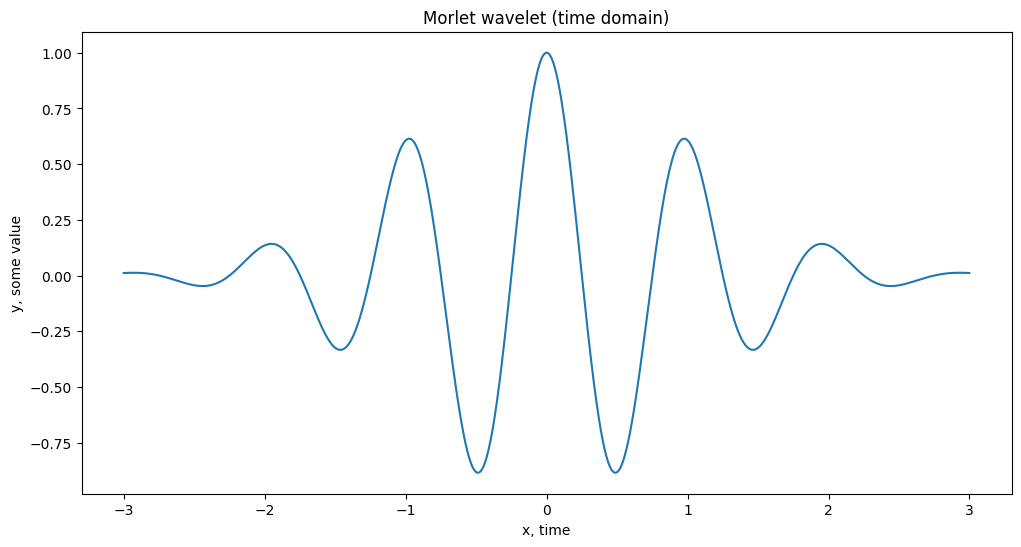

In [348]:
x_morlet = np.arange(-3, 3, 1 / 600)
y_morlet = morlet_wavelet(x_morlet)

plt.figure(figsize=(12, 6))
plt.plot(x_morlet, y_morlet)
plt.title("Morlet wavelet (time domain)")
plt.xlabel("x, time")
plt.ylabel("y, some value")
plt.show()

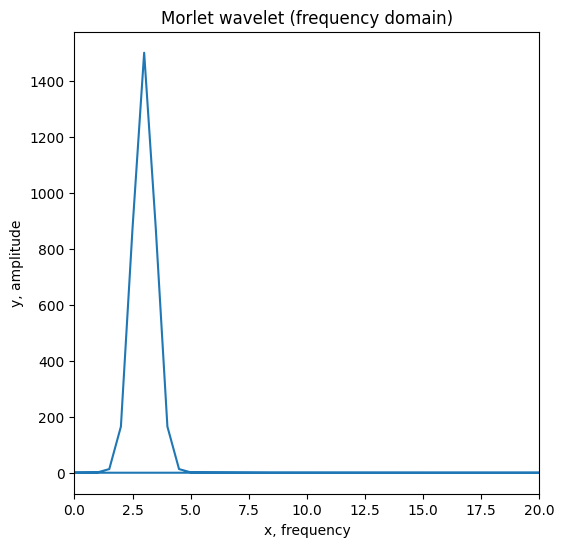

In [349]:
y_morlet_fft = np.fft.fft(y_morlet)
x_morlet_fft = np.fft.fftfreq(len(y_morlet_fft), 2 / len(y_morlet_fft))

plt.figure(figsize=(6, 6))
plt.plot(x_morlet_fft, np.abs(y_morlet_fft))
plt.xlim([0, 20])
plt.title("Morlet wavelet (frequency domain)")
plt.xlabel("x, frequency")
plt.ylabel("y, amplitude")
plt.show()

In [350]:
def mexican_hat_wavelet(t):
    return (1 - t ** 2) * np.exp(-(t ** 2) / 2)

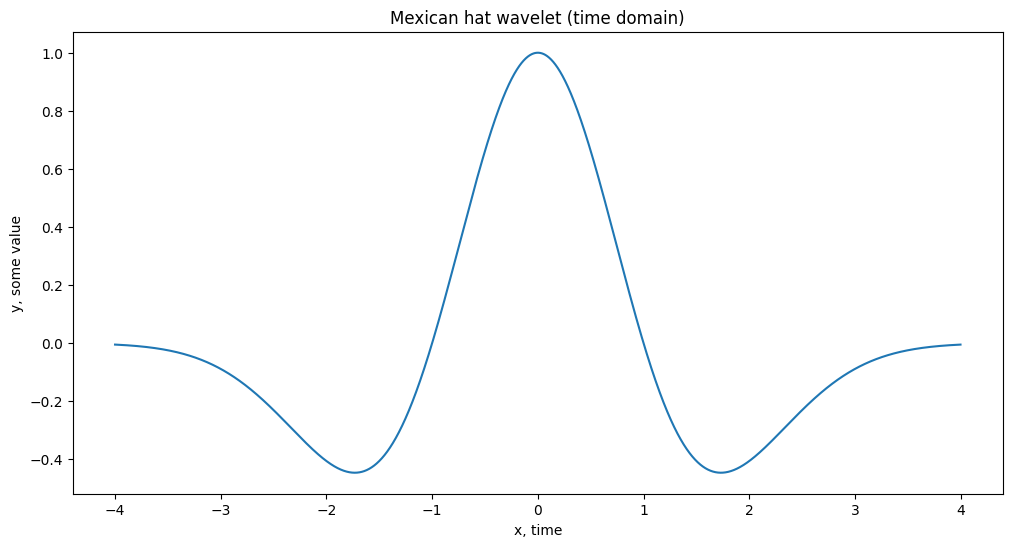

In [351]:
x_mexican_hat = np.arange(-4, 4, 1 / 800)
y_mexican_hat = mexican_hat_wavelet(x_mexican_hat)

plt.figure(figsize=(12, 6))
plt.plot(x_mexican_hat, y_mexican_hat)
plt.title("Mexican hat wavelet (time domain)")
plt.xlabel("x, time")
plt.ylabel("y, some value")
plt.show()

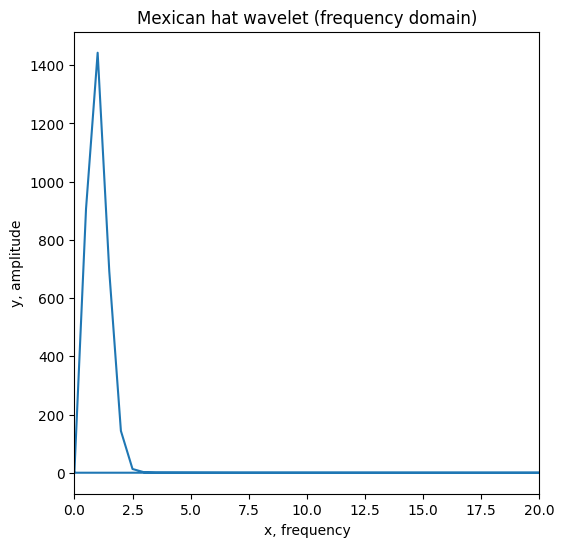

In [352]:
y_mexican_hat_fft = np.fft.fft(y_mexican_hat)
x_mexican_hat_fft = np.fft.fftfreq(len(y_mexican_hat_fft), 2 / len(y_mexican_hat_fft))

plt.figure(figsize=(6, 6))
plt.plot(x_mexican_hat_fft, np.abs(y_mexican_hat_fft))
plt.xlim([0, 20])
plt.title("Mexican hat wavelet (frequency domain)")
plt.xlabel("x, frequency")
plt.ylabel("y, amplitude")
plt.show()

In [353]:
def haar_wavelet(t):
    if 0 <= t and t < 0.5:
        return 1
    elif 0.5 <= t < 1:
        return -1
    else:
        return 0

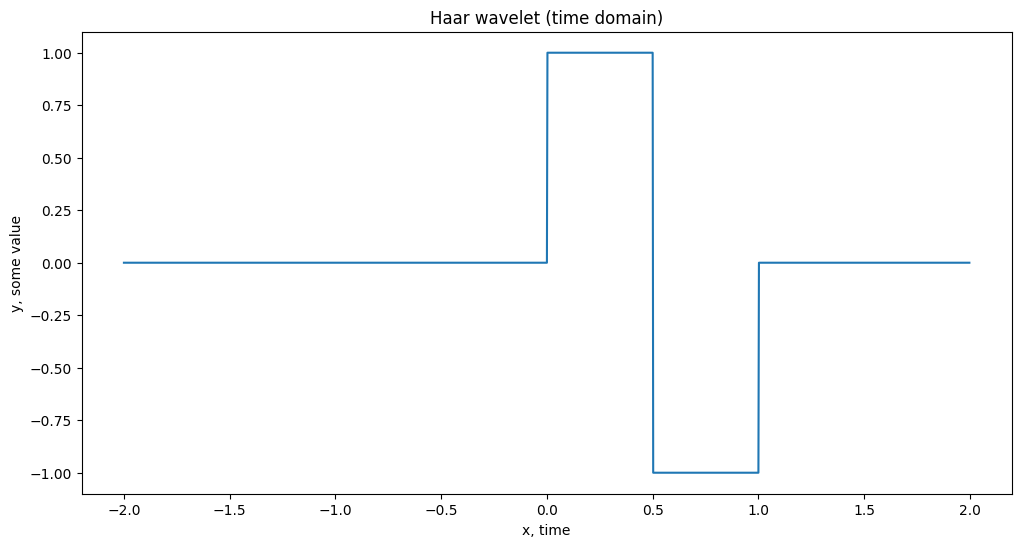

In [354]:
x_haar = np.arange(-2, 2, 1 / 400)
y_haar = np.array([haar_wavelet(element) for element in x_haar])

plt.figure(figsize=(12, 6))
plt.plot(x_haar, y_haar)
plt.title("Haar wavelet (time domain)")
plt.xlabel("x, time")
plt.ylabel("y, some value")
plt.show()

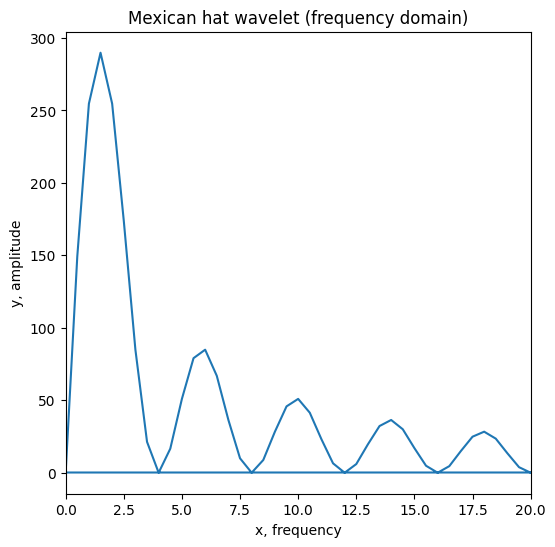

In [355]:
y_haar_fft = np.fft.fft(y_haar)
x_haar_fft = np.fft.fftfreq(len(y_haar_fft), 2 / len(y_haar_fft))

plt.figure(figsize=(6, 6))
plt.plot(x_haar_fft, np.abs(y_haar_fft))
plt.xlim([0, 20])
plt.title("Mexican hat wavelet (frequency domain)")
plt.xlabel("x, frequency")
plt.ylabel("y, amplitude")
plt.show()

In [356]:
def cos_func(x):
    f1 = 0.5
    f2 = 0.8
    f3 = 2
    w1 = 2 * np.pi * f1
    w2 = 2 * np.pi * f2
    w3 = 2 * np.pi * f3
    return np.cos(w1 * x) + np.cos(w2 * x) + np.cos(w3 * x) * np.exp(-x / 2)

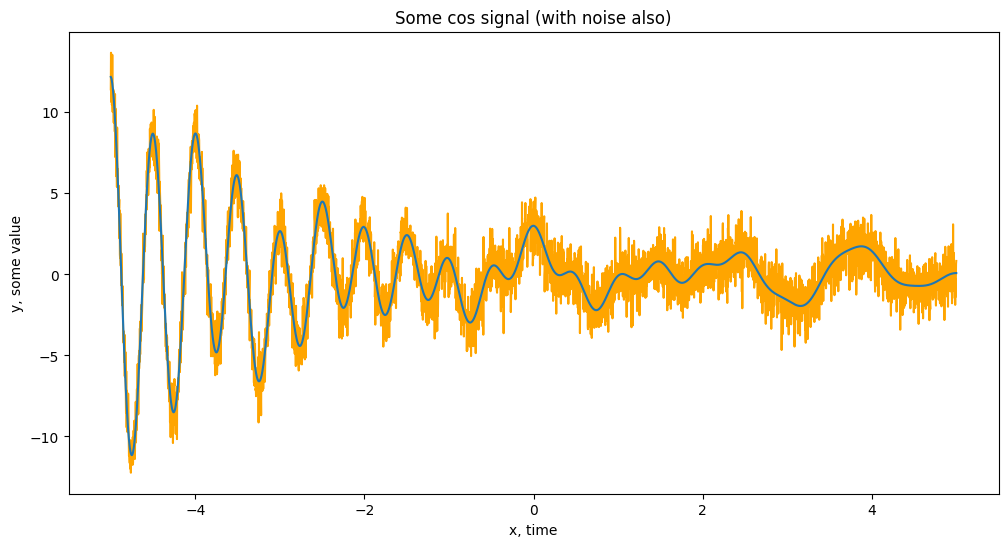

In [357]:
x_cos = np.linspace(-5, 5, 4000)
y_cos = cos_func(x_cos)
y_cos_noise = y_cos + np.random.normal(0, 1, 4000)

plt.figure(figsize=(12, 6))
plt.plot(x_cos, y_cos_noise, 'orange')
plt.plot(x_cos, y_cos)
plt.title("Some cos signal (with noise also)")
plt.xlabel("x, time")
plt.ylabel("y, some value")
plt.show()

In [358]:
kernel_args = np.linspace(-4, 4, 600)

kernel_morlet = morlet_wavelet(kernel_args)
kernel_mexican_hat = mexican_hat_wavelet(kernel_args)
kernel_haar = np.array([haar_wavelet(arg) for arg in kernel_args])

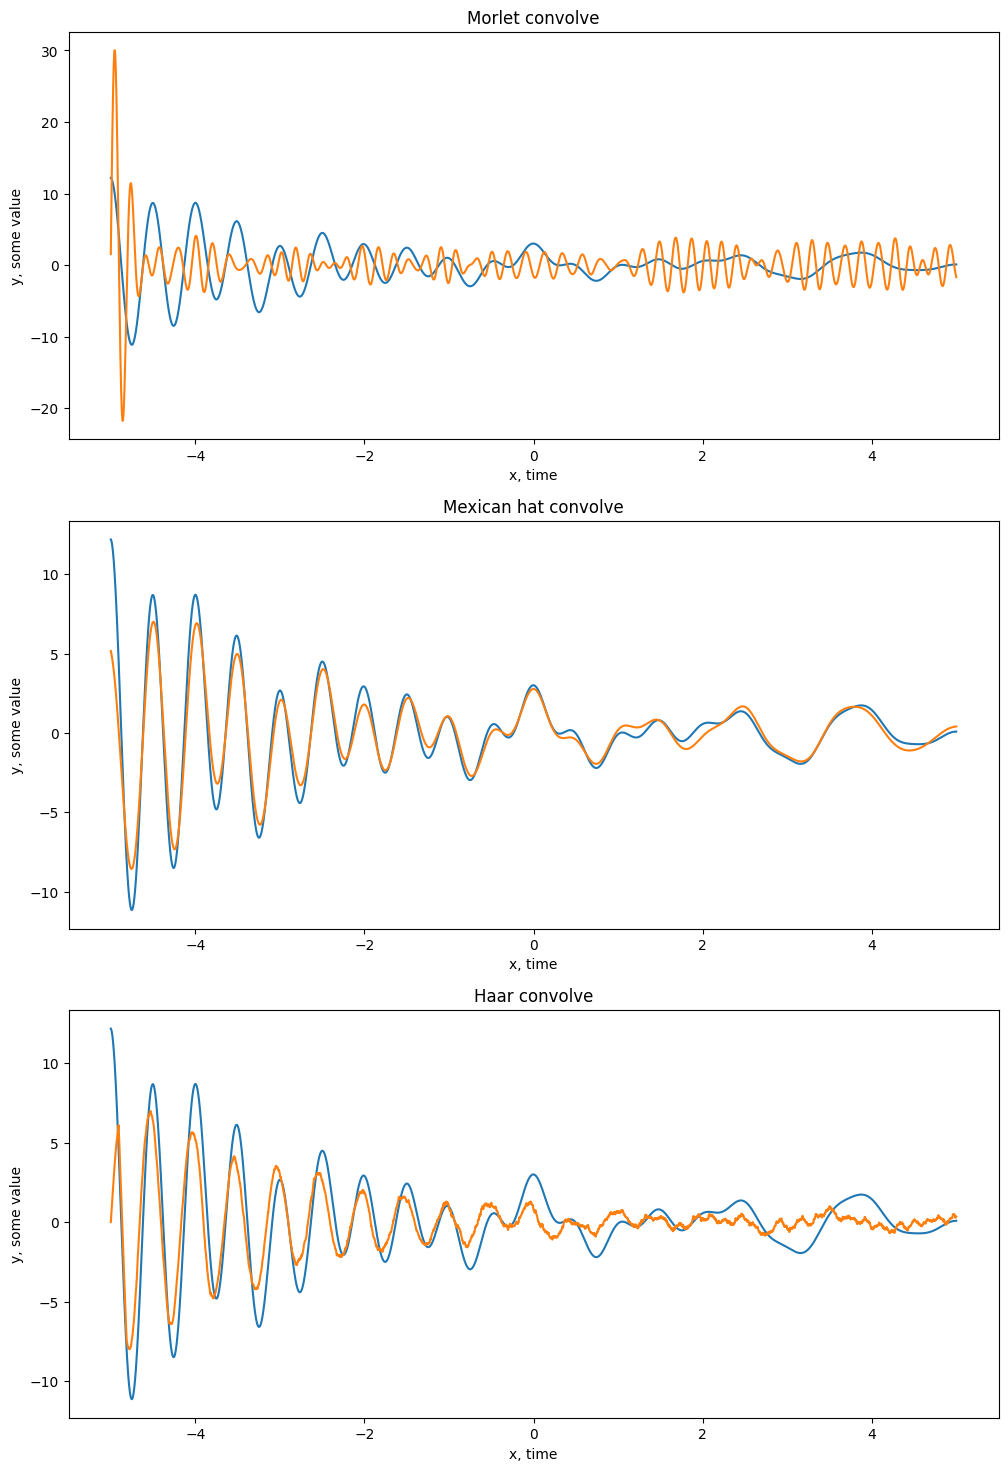

In [359]:
conv_morlet = np.convolve(y_cos_noise, kernel_morlet, mode='same')
conv_mexican_hat = np.convolve(y_cos_noise, kernel_mexican_hat, mode='same')
conv_haar = np.convolve(y_cos_noise, kernel_haar, mode='same')

conv_morlet *= 30 / max(conv_morlet)
conv_mexican_hat *= 7 / max(conv_mexican_hat)
conv_haar *= 7 / max(conv_haar)


plt.figure(figsize=(12, 18))

plt.subplot(311)
plt.plot(x_cos, y_cos)
plt.plot(x_cos, conv_morlet)
plt.title("Morlet convolve")
plt.xlabel("x, time")
plt.ylabel("y, some value")

plt.subplot(312)
plt.plot(x_cos, y_cos)
plt.plot(x_cos, conv_mexican_hat)
plt.title("Mexican hat convolve")
plt.xlabel("x, time")
plt.ylabel("y, some value")

plt.subplot(313)
plt.plot(x_cos, y_cos)
plt.plot(x_cos, conv_haar)
plt.title("Haar convolve")
plt.xlabel("x, time")
plt.ylabel("y, some value")

plt.show()

In [360]:
def changing_cos(x):
    f = np.exp(abs(x) / 4 + 1)
    w = 2 * np.pi * f
    return np.cos(w * x)

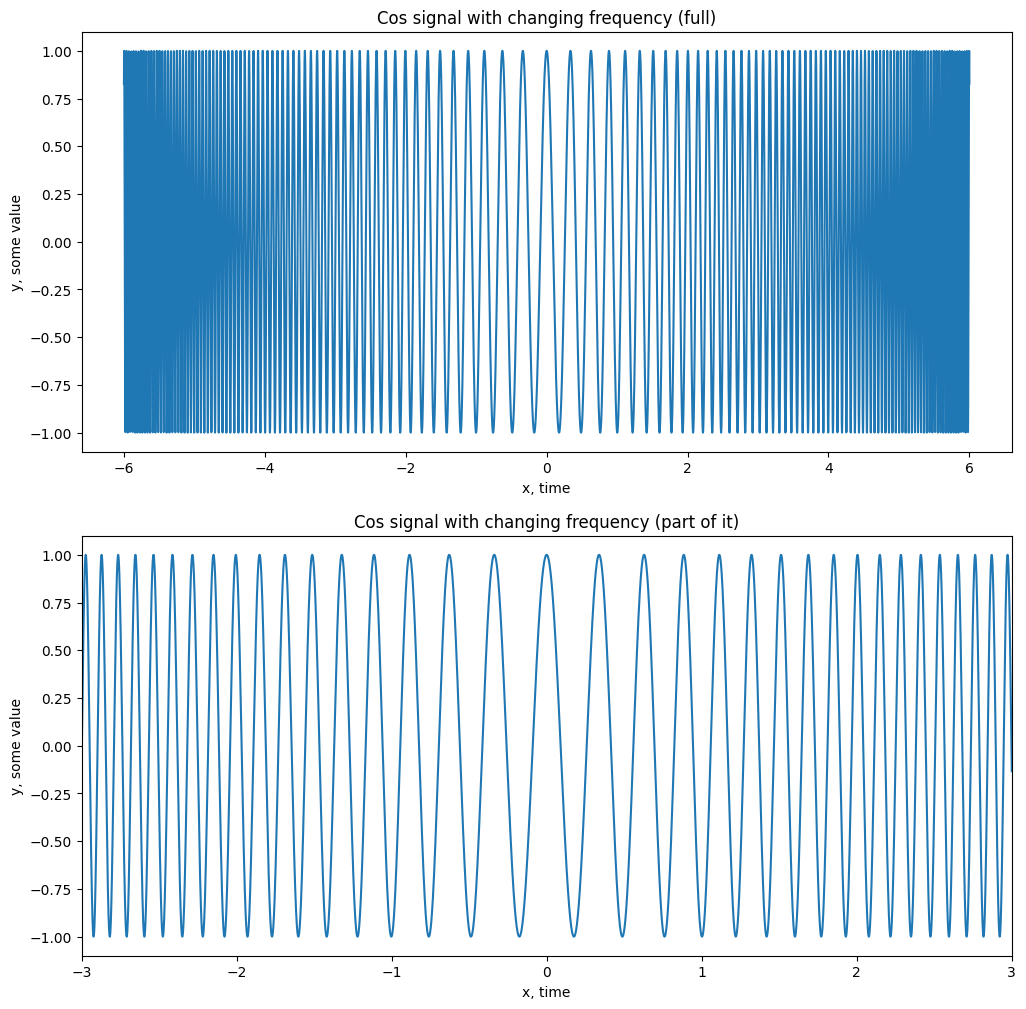

In [361]:
arg_changing = np.linspace(-6, 6, 12000)
y_changing = changing_cos(arg_changing)

plt.figure(figsize=(12, 12))

plt.subplot(211)
plt.plot(arg_changing, y_changing)
plt.title("Cos signal with changing frequency (full)")
plt.xlabel("x, time")
plt.ylabel("y, some value")

plt.subplot(212)
plt.plot(arg_changing, y_changing)
plt.title("Cos signal with changing frequency (part of it)")
plt.xlim([-3, 3])
plt.xlabel("x, time")
plt.ylabel("y, some value")
plt.show()

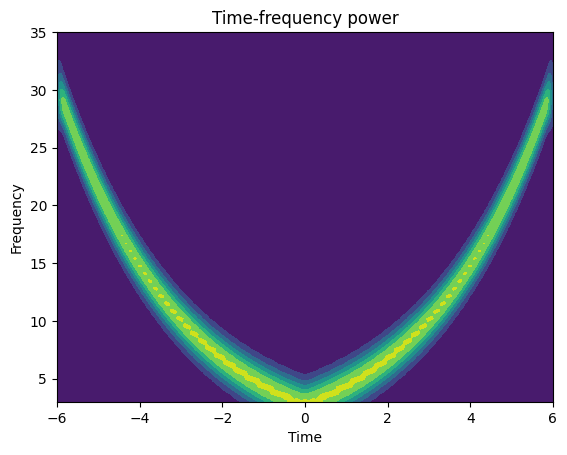

In [362]:
pnts = len(arg_changing)

freq_base = 50
freqs  = np.linspace(3, 35, freq_base)
fwhm  = .2 

Ws = np.zeros((freq_base, len(arg_changing)), dtype=complex)

for wi in range(0, freq_base):
    gauss = np.exp(-(4 * np.log(2) * arg_changing**2) / fwhm**2)
    Ws[wi, :] = np.exp(1j * 2 * np.pi * freqs[wi] * arg_changing) * gauss
    
conv = pnts * 2-1
half = int(np.floor(pnts / 2) + 1)
sigX = scipy.fftpack.fft(y_changing, conv)
tf = np.zeros((freq_base, len(arg_changing)))

for fi in range(freq_base):
    waveX = scipy.fftpack.fft(Ws[fi,:], conv)
    waveX = waveX / np.max(waveX)
    conv_res = scipy.fftpack.ifft(waveX * sigX)
    conv_res = conv_res[half - 3 : -half]
    tf[fi, :] = np.abs(conv_res)**2
    
plt.title('Time-frequency power')
plt.contourf(arg_changing, freqs, tf)
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()

In [363]:
brain_data = scipy.io.loadmat('Lab6_Data.mat')
print(brain_data)

data = brain_data['data'][0]
s_rate = brain_data['srate'][0]
time_vec = brain_data['timevec'][0]
print('Data: ', data)
print('Sample rate: ', s_rate)
print('Time: ', time_vec)

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Sat Sep 01 21:46:43 2018', '__version__': '1.0', '__globals__': [], 'data': array([[12.203051, 16.38355 , 12.084306, ..., 21.902597, 16.780333,
        17.64946 ]], dtype=float32), 'srate': array([[762.93945312]]), 'timevec': array([[-0.49992064, -0.49860992, -0.4972992 , ...,  1.49761664,
         1.49892736,  1.50023808]])}
Data:  [12.203051 16.38355  12.084306 ... 21.902597 16.780333 17.64946 ]
Sample rate:  [762.93945312]
Time:  [-0.49992064 -0.49860992 -0.4972992  ...  1.49761664  1.49892736
  1.50023808]


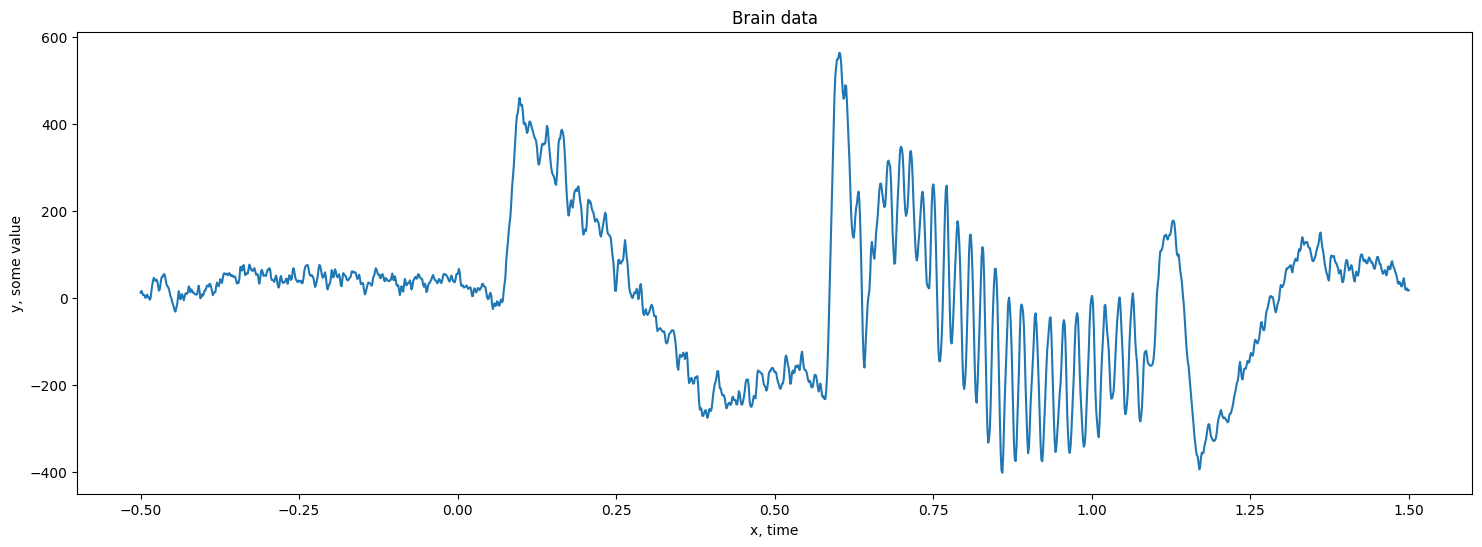

In [364]:
plt.figure(figsize=(18, 6))
plt.plot(time_vec, data)
plt.title("Brain data")
plt.xlabel("x, time")
plt.ylabel("y, some value")
plt.show()

C:\Users\zhukz\AppData\Local\Temp\ipykernel_20988\2357644244.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Wtime = np.arange(-2, 2, 1 / s_rate)


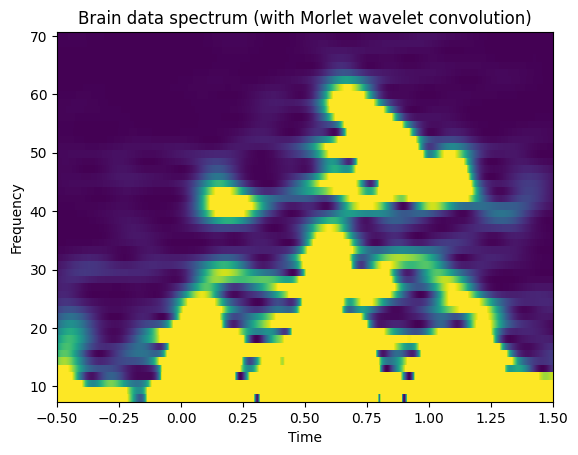

In [365]:
wav = morlet_wavelet(time_vec)
y = np.convolve(wav, data)

freq_base = 50 
freqs  = np.linspace(8, 70, freq_base)
fs  = .2 

Wtime = np.arange(-2, 2, 1 / s_rate)

Ws = np.zeros((freq_base, len(Wtime)), dtype=complex)

for wi in range(0, freq_base):
    gauss = np.exp(-(4 * np.log(2) * Wtime**2) / fs**2)
    Ws[wi,:] = np.exp(1j * 2 * np.pi * freqs[wi] * Wtime) * gauss
    
conv = len(time_vec) + len(Wtime) - 1
half = int(np.floor(len(Wtime) / 2))

dataX = scipy.fftpack.fft(y, conv)

tf = np.zeros((freq_base, len(time_vec)))

for fi in range(0, freq_base):
    waveX = np.fft.fft(Ws[fi,:], conv)
    waveX = waveX/np.max(waveX)

    conv_res = scipy.fftpack.ifft(waveX * dataX)
    conv_res = conv_res[half - 1:-half]
    
    tf[fi, :] = np.abs(conv_res)**2
    
plt.title('Brain data spectrum (with Morlet wavelet convolution)')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.pcolormesh(time_vec, freqs, tf, vmin=0, vmax=1e3)
plt.show()